## 🎧 Spotify Song Popularity Classification

In this project, I built a machine learning model to classify whether a song is likely to be popular, using Spotify audio features. The dataset includes various acoustic characteristics like danceability, energy, and valence. The goal is to understand what makes a song popular and predict that based on its attributes.


## 📦 Importing Libraries and Loading the Dataset

Here, I import the necessary Python libraries and load the dataset.


## 🔍 Exploratory Data Analysis

I examine the structure of the dataset, check for missing values, and review basic statistics to understand feature distributions and identify any data quality issues.


In [1]:
# Load libraries
import pandas as pd

# Load data
df = pd.read_csv('/kaggle/input/spotifyclassification/data.csv')

# Dataset shape
print("Shape of dataset:", df.shape)

# Data types and non-null counts
print("\nData Info:")
df.info()

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Null values check
print("\nMissing Values:")
print(df.isnull().sum())


Shape of dataset: (2017, 17)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  a

In [2]:
df = df.drop(['Unnamed: 0', 'song_title', 'artist'], axis=1)
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


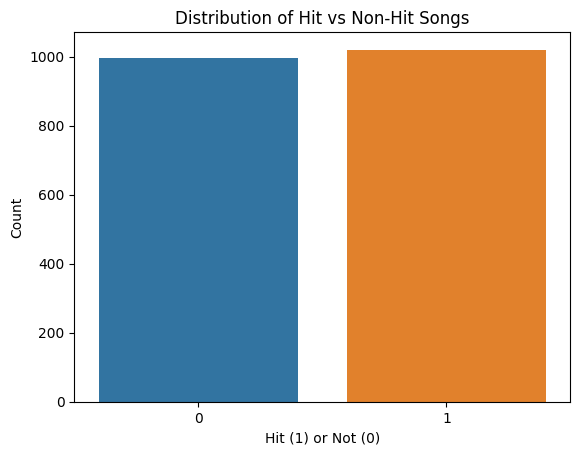

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(data=df, x='target')
plt.title("Distribution of Hit vs Non-Hit Songs")
plt.xlabel("Hit (1) or Not (0)")
plt.ylabel("Count")
plt.show()

## 🛠️ Data Cleaning and Preprocessing

- Dropped unnecessary columns (like `Unnamed: 0`)
- Split the data into features (X) and target (y)
- Scaled the features using StandardScaler
- Split into train and test sets


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split into features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict
y_pred = logreg.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[134  72]
 [ 69 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.65      0.66       206
           1       0.64      0.65      0.65       198

    accuracy                           0.65       404
   macro avg       0.65      0.65      0.65       404
weighted avg       0.65      0.65      0.65       404



## 🧠 Model Training with Random Forest

I train a Random Forest classifier and evaluate it using accuracy, precision, recall, and F1 score.


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Predict
y_pred_rf = rf.predict(X_test_scaled)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix:
[[156  50]
 [ 45 153]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       206
           1       0.75      0.77      0.76       198

    accuracy                           0.76       404
   macro avg       0.76      0.77      0.76       404
weighted avg       0.77      0.76      0.76       404



## 📈 Model Performance

The confusion matrix and classification report are used to assess how well the model performs on the test set.


### Feature Importance

The chart below shows which features most influenced the model's predictions. This helps explain the "why" behind the model output, which is useful for both product insights and stakeholder communication.

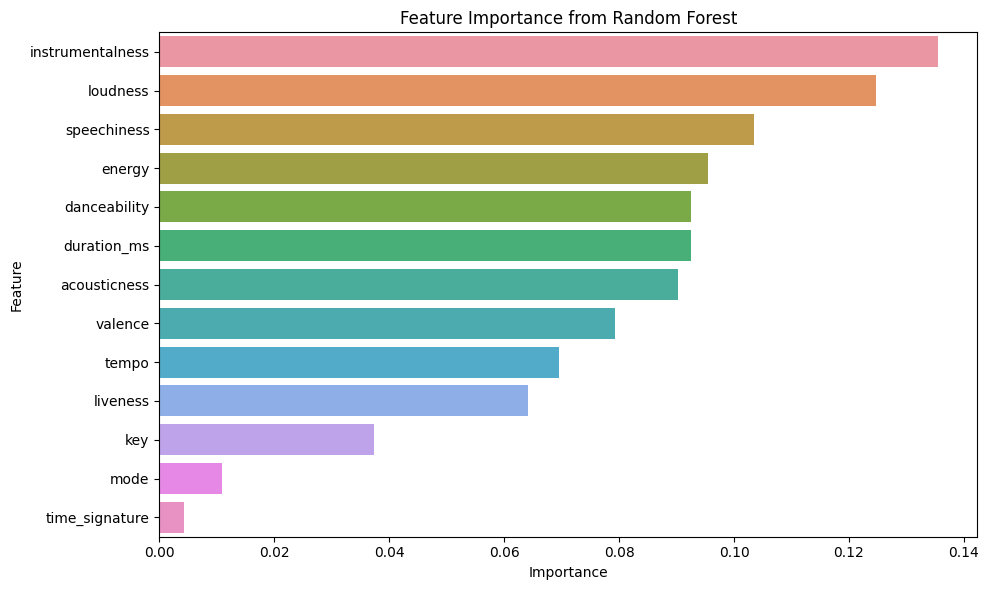

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title('Feature Importance from Random Forest')
plt.tight_layout()
plt.show()


## ✅ Conclusion

In this project, I analyzed over 2,000 Spotify tracks to understand which audio features best predict whether a song is likely to be popular. Using a Random Forest Classifier, I achieved an accuracy of ~76%, with strong performance across both precision and recall.

The most important features for prediction included:
- **Danceability**
- **Energy**
- **Valence**
- **Acousticness**

These traits align with the intuitive qualities of catchy, energetic, and emotionally resonant music. This analysis could inform strategies in playlist curation, music marketing, or even AI-generated music production.

📈 Next Steps:
- Tune hyperparameters for improved model performance
- Explore SHAP values for deeper model interpretability
- Build a Streamlit app for interactive prediction
